## **Data Exploration of Negative Tweets rooted on the NTF-ELCAC's Red-tagging of Community Pantries during Covid-19 Pandemic**
---


In [197]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import nltk

### **Importing the dataset**

Before importing the dataset, we have taken into the account and replaced the errors that were found during the data review process especially those related to the accuracy of the inputted dates and their formatting.

In [198]:
#url = "https://github.com/cs132group56/Group-56-Portfolio/raw/main/exploration/Dataset%20-%20Group%2056.xlsx"
#df=pd.read_excel(url)
df=pd.read_excel("Dataset - Group 56.xlsx")
pd.set_option("display.max_columns", df.shape[1])
df.head()

,ID,Timestamp,Tweet URL,Group,Collector,Category,Topic,Keywords,Account handle,Account name,Account bio,Account type,Joined,Following,Followers,Location,Tweet,Date posted,Tweet Translated,Tweet Type,Screenshot,Content type,Likes,Replies,Retweets,Quote Tweets,Views,Rating,Reasoning,Remarks,Reviewer,Review
0,56-1,29/03/23 08:50:31,https://twitter.com/eto_tome/status/1593016340...,56,"Jafri, Ali Mahmood",REDT,Negative Tweets towards Community pantries,"""Communist"" ""pantry""",@eto_tome,tome eto,Medical Professional. Business owner.,Anonymous,12/11,221,381,NaN,@Moneyma78808638 Communist pantry na puro kamo...,17/11/22 07:01,NaN,"Text, Reply",https://drive.google.com/file/d/1-HDQ08jQspUQ3...,Emotional,1,0,0,0,NaN,NaN,The Maginhawa pantry closed due to the founder...,No location,NaN,NaN
1,56-2,29/03/23 22:45:45,https://twitter.com/gon_bmt216a/status/1593478...,56,"Jafri, Ali Mahmood",REDT,Negative Tweets towards Community pantries,"""Communist"" ""pantry""",@gon_bmt216a,hwarang ◐○◑👆🌈 🤴,"JEPROKS\n🎹🎼🎤asal ay gahaman,\nmalakas sa inuma...",Anonymous,05/21,812,719,14.8745°N 121.1446°E,@Scarlet87983415 @_miggypot29 Parang yon sa co...,18/11/22 13:37,NaN,"Text, Reply",https://drive.google.com/file/d/1UQCThjpQyGhDX...,Emotional,1,0,0,0,NaN,NaN,Rolando dela Cruz's death was not intentional ...,NaN,NaN,NaN
2,56-3,29/03/23 22:49:31,https://twitter.com/si_ich_ivi/status/15745565...,56,"Jafri, Ali Mahmood",REDT,Negative Tweets towards Community pantries,"""Communist"" ""pantry""",@si_ich_ivi,ɔ ɥ ǝ ʌ,ɹʇs ƃoop sʇnɟɟ. ɹoɐsʇs sʇndıp sʇnɟɟ.,Anonymous,09/21,102,292,NaN,Communist Pantry na naman? Di na papatol yan. ...,27/09/22 08:28,NaN,"Text, Reply",https://drive.google.com/file/d/1tfaMZXN8NulVG...,Rational,0,0,0,0,NaN,NaN,There are always people in need of food and re...,Account location unavailable in bio,NaN,NaN
3,56-4,29/03/23 22:53:26,https://twitter.com/si_ich_ivi/status/15616560...,56,"Jafri, Ali Mahmood",REDT,Negative Tweets towards Community pantries,"""Communist"" ""pantry""",@si_ich_ivi,ɔ ɥ ǝ ʌ,ɹʇs ƃoop sʇnɟɟ. ɹoɐsʇs sʇndıp sʇnɟɟ.,Anonymous,09/21,102,292,NaN,@nick_nangit Walang pinagkaiba sa communist pa...,22/08/22 18:06,NaN,"Text, Reply",https://drive.google.com/file/d/1keszXvA7A58EC...,Rational,2,0,0,0,NaN,NaN,Non's community pantry is not affiliated with ...,Reply to unavailable tweet.\nAccount location ...,NaN,NaN
4,56-5,29/03/23 22:56:47,https://twitter.com/gon_bmt216a/status/1548222...,56,"Jafri, Ali Mahmood",REDT,Negative Tweets towards Community pantries,"""Communist"" ""pantry""",@gon_bmt216a,hwarang ◐○◑👆🌈 🤴,"JEPROKS\n🎹🎼🎤asal ay gahaman,\nmalakas sa inuma...",Anonymous,05/21,812,719,14.8745°N 121.1446°E,@Jjcruz2 @iamwhatiam300 Yon birthday communist...,16/07/22 16:26,NaN,"Text, Reply",https://drive.google.com/file/d/1Dhh0CFZUwrVlm...,Emotional,2,0,0,0,NaN,NaN,Rolando dela Cruz's death was not intentional ...,No location,NaN,NaN


### **General Dataframe Information**

In this section, we identify the shape, number of features, data types, number of missing values, and range of values per feature of the initial imported dataset to get a grasp of the data that we will be dealing with.

In [199]:
#What is the size/shape of the dataset?
print("="*40)
print("Dataframe shape:",df.shape)
#How many columns are there in the dataset?
print("="*40)
print("Number of columns:",df.shape[1])
print("Columns:",df.columns.to_list())
#What is the data type of each column?
print("="*40)
print("Data types per column:")
for col in df.columns:
  print(col,":",df[col].map(type).unique())
#Are there any missing values in the dataset? If so, how many and in which columns?
print("="*40)
print(df.isnull().sum())
print("Columns with missing values", df.columns[df.isna().any()].tolist())
#What is the range of values for each numeric column in the dataset?
print("="*40)
print("Range of values per numeric column:")
print(df.describe().loc[['min', 'max']])
print("="*40)

Dataframe shape: (152, 32)
Number of columns: 32
Columns: ['ID', 'Timestamp', 'Tweet URL', 'Group', 'Collector', 'Category', 'Topic', 'Keywords', 'Account handle', 'Account name', 'Account bio', 'Account type', 'Joined', 'Following', 'Followers', 'Location', 'Tweet', 'Date posted', 'Tweet Translated', 'Tweet Type', 'Screenshot', 'Content type', 'Likes', 'Replies', 'Retweets', 'Quote Tweets', 'Views', 'Rating', 'Reasoning', 'Remarks', 'Reviewer', 'Review']
Data types per column:
ID : [<class 'str'>]
Timestamp : [<class 'str'>]
Tweet URL : [<class 'str'>]
Group : [<class 'int'>]
Collector : [<class 'str'>]
Category : [<class 'str'>]
Topic : [<class 'str'>]
Keywords : [<class 'str'>]
Account handle : [<class 'str'>]
Account name : [<class 'str'>]
Account bio : [<class 'str'> <class 'float'>]
Account type : [<class 'str'>]
Joined : [<class 'str'>]
Following : [<class 'int'>]
Followers : [<class 'int'>]
Location : [<class 'float'> <class 'str'>]
Tweet : [<class 'str'>]
Date posted : [<class

### **Preprocessing**

To limit the number of features we will need utilize for analysis, we've selected the following columns as relevant in the context of our research question and hypothesis.

1. **ID** serves as the unique identifier to the tweet.
2. **Account Handle** makes it easier to determine which user the tweet to.
3. **Account type** helps us identify whether the fake news is spread by a known personality.
4. **Joined** allows us to identify if the account was created around the same time as the NTF-ELCAC statement.
5. **Tweet** contains the tweet itself. It will be used for the NLP section later on.
6. **Tweet Type** allows us to identify the most common types of tweets that were posted depending on the time or date.
7. **Date posted** helps us gauge the timeframe it was posted in relation to the NTF-ELCAC statement.
8. **Content type** enables us to determine the types of content utilized in the tweets within the specific timeframe we're looking into.
9. **Likes, Replies, Retweets, Quote Tweets** enable us to compute the total reach and engagements of the tweets.

The other columns were removed as they're either extraneous information(i.e. Timestamp, Tweet URL, Account bio) or empty columns(i.e. Tweet Translated, Views). From these remaining columns, the primary feature we will use to answer the research question is *Date posted*.

In [200]:
included_cols = ['ID','Account type','Account handle','Joined','Tweet','Tweet Type','Date posted','Content type','Likes','Replies','Retweets','Quote Tweets'] 
df_trim = df[included_cols].copy(deep=True)
df_trim.set_index('ID')

,Account type,Account handle,Joined,Tweet,Tweet Type,Date posted,Content type,Likes,Replies,Retweets,Quote Tweets
ID,,,,,,,,,,,
56-1,Anonymous,@eto_tome,12/11,@Moneyma78808638 Communist pantry na puro kamo...,"Text, Reply",17/11/22 07:01,Emotional,1,0,0,0
56-2,Anonymous,@gon_bmt216a,05/21,@Scarlet87983415 @_miggypot29 Parang yon sa co...,"Text, Reply",18/11/22 13:37,Emotional,1,0,0,0
56-3,Anonymous,@si_ich_ivi,09/21,Communist Pantry na naman? Di na papatol yan. ...,"Text, Reply",27/09/22 08:28,Rational,0,0,0,0
56-4,Anonymous,@si_ich_ivi,09/21,@nick_nangit Walang pinagkaiba sa communist pa...,"Text, Reply",22/08/22 18:06,Rational,2,0,0,0
56-5,Anonymous,@gon_bmt216a,05/21,@Jjcruz2 @iamwhatiam300 Yon birthday communist...,"Text, Reply",16/07/22 16:26,Emotional,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
56-148,Anonymous,@gigaigurlmd,02/20,"""Trailblazed community pantry in the country""?...","Text, Reply",03/08/21 20:41,Emotional,0,0,0,0
56-149,Anonymous,@christo48610396,12/19,Grabe tlga si DUTERTE!! Pinagipunan yan ng mga...,"Text, Reply",12/10/21 11:21,Emotional,0,0,0,0
56-150,Anonymous,@63TheRenegade,06/17,The community pantry episode was an attempt to...,"Text, Reply",25/05/22 07:10,Rational,3,1,1,0


This brings our number of columns down to 12. Now that we've removed the extra columns. We once again display the general information of the trimmed dataframe for clarity.

In [201]:
#What is the size/shape of the dataset?
print("="*40)
print("Dataframe shape:",df_trim.shape)
#How many columns are there in the dataset?
print("="*40)
print("Number of columns:",df_trim.shape[1])
print("Columns:",df_trim.columns.to_list())
#Are there any missing values in the dataset? If so, how many and in which columns?
print("="*40)
print(df_trim.isnull().sum())
print("Columns with missing values", df_trim.columns[df_trim.isna().any()].tolist())
#What is the data type of each column?
print("="*40)
print("Data types per column:")
for col in df_trim.columns:
  print(col,":",df_trim[col].map(type).unique())
#What is the range of values for each numeric column in the dataset?
print("="*40)
print("Range of values per numeric column:")
print(df_trim.describe().loc[['min', 'max']])
print("="*40)

Dataframe shape: (152, 12)
Number of columns: 12
Columns: ['ID', 'Account type', 'Account handle', 'Joined', 'Tweet', 'Tweet Type', 'Date posted', 'Content type', 'Likes', 'Replies', 'Retweets', 'Quote Tweets']
ID                0
Account type      0
Account handle    0
Joined            0
Tweet             0
Tweet Type        0
Date posted       0
Content type      0
Likes             0
Replies           0
Retweets          0
Quote Tweets      0
dtype: int64
Columns with missing values []
Data types per column:
ID : [<class 'str'>]
Account type : [<class 'str'>]
Account handle : [<class 'str'>]
Joined : [<class 'str'>]
Tweet : [<class 'str'>]
Tweet Type : [<class 'str'>]
Date posted : [<class 'str'>]
Content type : [<class 'str'>]
Likes : [<class 'int'>]
Replies : [<class 'int'>]
Retweets : [<class 'int'>]
Quote Tweets : [<class 'int'>]
Range of values per numeric column:
     Likes  Replies  Retweets  Quote Tweets
min    0.0      0.0       0.0           0.0
max  912.0     76.0     12

**Handling missing values/ensuring no missing values**

In [202]:
print(df_trim.isnull().sum())
print("Columns with missing values", df_trim.columns[df_trim.isna().any()].tolist())

ID                0
Account type      0
Account handle    0
Joined            0
Tweet             0
Tweet Type        0
Date posted       0
Content type      0
Likes             0
Replies           0
Retweets          0
Quote Tweets      0
dtype: int64
Columns with missing values []


Notice the presence of empty values when we displayed the general information for the initial dataset df. This time however, since all of the columns containing empty values were also removed from df_trim, there are no missing values that we need to handle.

**Ensuring formatting consistency (date, labels, etc.)**

To ensure consistent labeling, we will be making a minor change to the *Tweet Type* and *Quote Tweets* columns such that their second word is also in lowercase.

In [203]:
df_trim = df_trim.rename(columns={'Tweet Type': 'Tweet type','Quote Tweets': 'Quote tweets'})
print(df_trim.columns)

Index(['ID', 'Account type', 'Account handle', 'Joined', 'Tweet', 'Tweet type',
       'Date posted', 'Content type', 'Likes', 'Replies', 'Retweets',
       'Quote tweets'],
      dtype='object')


Since our date columns, *Date posted* and *Joined*, are imported as type *string*, we will be converting both of them into *datetime* instead. Although not necessary, we will also be converting *Account type*, *Content type*, and *Tweet type* into *category* types.

In [204]:

pd.set_option("display.max_columns", df_trim.shape[1])
#Convert Date posted into datetime
df_trim['Date posted'] = pd.to_datetime(df_trim['Date posted'], format="%d/%m/%y %H:%M")

#Check for dates outside scope
Recent_dates = df_trim['Date posted'].map(lambda x: True if (x.year<2016 or x.year > 2022) else False)
print("Recent dates:\n",Recent_dates.value_counts(),"\n") #All false so no recent tweets

#Convert Joined into datetime
df_trim['Joined'] = pd.to_datetime(df_trim['Joined'],format='%m/%y')

#Convert Account type into category
df_trim['Account type'] = df_trim['Account type'].astype('category')

#Convert Tweet type into category
df_trim['Tweet type'] = df_trim['Tweet type'].astype('category')

#Convert Content type into category
df_trim['Content type'] = df_trim['Content type'].astype('category')

print(df_trim.dtypes) 

Recent dates:
 False    152
Name: Date posted, dtype: int64 

ID                        object
Account type            category
Account handle            object
Joined            datetime64[ns]
Tweet                     object
Tweet type              category
Date posted       datetime64[ns]
Content type            category
Likes                      int64
Replies                    int64
Retweets                   int64
Quote tweets               int64
dtype: object


We performed an additional check to identify any tweets that were posted before 2016 or after 2022. Since all the tweets in this check had a value of false, then the dates are all within scope. It is important to mention that the other columns in *df_trim* were already manually formatted prior to importing. Therefore, they contain only a single appropriate data type and no formatting changes are needed for these columns. 

**Normalization/standardization/scaling and Handling outliers**

In [205]:
df_trim.describe()

,Likes,Replies,Retweets,Quote tweets
count,152.000000,152.000000,152.000000,152.000000
mean,15.493421,1.000000,2.736842,0.289474
std,83.830086,6.314076,12.971562,1.617911
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,3.250000,0.250000,0.000000,0.000000
max,912.000000,76.000000,125.000000,17.000000


From this table, it is evident that the only columns which contain numerical values are Likes, Replies, Retweets, and Quote Tweets. However, since our focus is on the number of tweets and the date they are posted, there is no need to scale and remove outliers based on the Likes, Replies, Retweets, or Quote Tweets of each tweet.

**Categorical data encoding**

The only categorical columns we will need to consider are *Account type*,*Content type*, and *Tweet type*. Since both of these categories are not ordinal, we can implemenent one-hot encoding on them. Note the abscence of the *Media* value under *Account type*. We'll be using MultiLabelBinarizer to one-hot encode *Tweet type* and *Content type* as each tweet can be labelled with multiple values from the category.

In [206]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

df_encoded = df_trim.copy(deep=True)

#Print unique values of the three columns
print("="*10,"Unique contents of Tweet type","="*10)
for i in df_encoded['Tweet type'].unique():
    print(i)
print("="*9,"Unique contents of Account type","="*9)
for i in df_encoded['Account type'].unique():
    print(i)
print("="*9,"Unique contents of Content type","="*9)
for i in df_encoded['Content type'].unique():
    print(i)
print("="*51)

#One-hot encode the three columns
df_encoded['Tweet type'] = df_encoded['Tweet type'].str.split(', ')
tweet_encoded = pd.DataFrame(mlb.fit_transform(df_encoded['Tweet type']), columns=mlb.classes_)
df_encoded = pd.concat([df_encoded, tweet_encoded], axis=1)

account_encoded = pd.get_dummies(df_encoded['Account type'])
df_encoded = pd.concat([df_encoded, account_encoded], axis=1)

df_encoded['Content type'] = df_encoded['Content type'].str.split(', ')
content_encoded = pd.DataFrame(mlb.fit_transform(df_encoded['Content type']), columns=mlb.classes_)
df_encoded = pd.concat([df_encoded, content_encoded], axis=1)

#Drop the three columns used
df_encoded = df_encoded.drop(['Content type','Tweet type','Account type'], axis=1)

pd.set_option("display.max_columns", df_encoded.shape[1])
df_encoded.set_index('ID')
df_encoded.head()


========== Unique contents of Tweet type ==========
Text, Reply
Text, Image
Text, Reply, Image
Text
Text, URL
Text, Video
Text, Image, Reply
Text, URL, Image
Image, Reply
========= Unique contents of Account type =========
Anonymous
Identified
========= Unique contents of Content type =========
Emotional
Rational
Rational, Emotional
Transactional
Emotional, Rational


,ID,Account handle,Joined,Tweet,Date posted,Likes,Replies,Retweets,Quote tweets,Image,Reply,Text,URL,Video,Anonymous,Identified,Emotional,Rational,Transactional
0,56-1,@eto_tome,2011-12-01,@Moneyma78808638 Communist pantry na puro kamo...,2022-11-17 07:01:00,1,0,0,0,0,1,1,0,0,1,0,1,0,0
1,56-2,@gon_bmt216a,2021-05-01,@Scarlet87983415 @_miggypot29 Parang yon sa co...,2022-11-18 13:37:00,1,0,0,0,0,1,1,0,0,1,0,1,0,0
2,56-3,@si_ich_ivi,2021-09-01,Communist Pantry na naman? Di na papatol yan. ...,2022-09-27 08:28:00,0,0,0,0,0,1,1,0,0,1,0,0,1,0
3,56-4,@si_ich_ivi,2021-09-01,@nick_nangit Walang pinagkaiba sa communist pa...,2022-08-22 18:06:00,2,0,0,0,0,1,1,0,0,1,0,0,1,0
4,56-5,@gon_bmt216a,2021-05-01,@Jjcruz2 @iamwhatiam300 Yon birthday communist...,2022-07-16 16:26:00,2,0,0,0,0,1,1,0,0,1,0,1,0,0


### **Natural Language Processing**

The code found in this section is a modified version of the code in **Basics - NLP.ipynb**. As our project is focused on time series analysis, the results of the NLP are inconsequential in answering our research question.

**Data Cleaning**

In this section, we'll be transforming the emojis and emoticons present in the tweet into text form, turn each word into lowercase for consistency, and remove punctation marks from the text.

In [207]:
import re
import copy
import string

# Handle Emojis [2]
url_emoji = "https://drive.google.com/uc?id=1G1vIkkbqPBYPKHcQ8qy0G2zkoab2Qv4v"
df_emoji = pd.read_pickle(url_emoji)
df_emoji = {v: k for k, v in df_emoji.items()}

def emoji_to_word(text):
  for emot in df_emoji:
    text = re.sub(r'('+emot+')', "_".join(df_emoji[emot].replace(",","").replace(":","").split()), text)
  return text

# Handle Emoticons [2]
url_emote = "https://drive.google.com/uc?id=1HDpafp97gCl9xZTQWMgP2kKK_NuhENlE"
df_emote = pd.read_pickle(url_emote)

def emote_to_word(text):
    for emot in df_emote:
        text = re.sub(u'('+emot+')', "_".join(df_emote[emot].replace(",","").split()), text)
        text = text.replace("<3", "heart" ) # not included in emoticons database
    return text

texts = copy.deepcopy(df_encoded['Tweet'].tolist())
texts = [emoji_to_word(t) for t in texts]
texts = [emote_to_word(t) for t in texts]

# convert to lowercase
texts = [t.lower() for t in texts]

# remove punctuation
texts = [t.translate(str.maketrans('', '', string.punctuation)) for t in texts]

df_emoji = pd.DataFrame({'Original': df_encoded['Tweet'], 'Without Emotes': texts})
df_emoji.style.set_properties(**{'text-align': 'left'})
df_emoji.head()

,Original,Without Emotes
0,@Moneyma78808638 Communist pantry na puro kamo...,moneyma78808638 communist pantry na puro kamot...
1,@Scarlet87983415 @_miggypot29 Parang yon sa co...,scarlet87983415 miggypot29 parang yon sa commu...
2,Communist Pantry na naman? Di na papatol yan. ...,communist pantry na naman di na papatol yan la...
3,@nick_nangit Walang pinagkaiba sa communist pa...,nicknangit walang pinagkaiba sa communist pant...
4,@Jjcruz2 @iamwhatiam300 Yon birthday communist...,jjcruz2 iamwhatiam300 yon birthday communist p...


**Translation**

Next, we make use of Google translate to translate our original text into English as we'll be using English-based NLP in the following sections.

In [208]:
%%capture
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!pip install googletrans==3.1.0a0

[nltk_data] Downloading package punkt to C:\Users\Dale
[nltk_data]     Encinares\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Dale
[nltk_data]     Encinares\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dale
[nltk_data]     Encinares\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [209]:
# CHEAP SOLUTION: translate texts to English (this is not 100% accurate)
from googletrans import Translator

# translate to English
translator = Translator()
texts_en = [t.text for t in translator.translate(texts, src='tl', dest='en')]

df_en = pd.DataFrame({'Original': texts, 'English': texts_en})
df_en.style.set_properties(**{'text-align': 'left'})
df_en.head()

,Original,English
0,moneyma78808638 communist pantry na puro kamot...,moneyma78808638 communist pantry that is only ...
1,scarlet87983415 miggypot29 parang yon sa commu...,scarlet87983415 miggypot29 it's like that in t...
2,communist pantry na naman di na papatol yan la...,"communist pantry again, that won't cut it, esp..."
3,nicknangit walang pinagkaiba sa communist pant...,nick but it's no different from the communist ...
4,jjcruz2 iamwhatiam300 yon birthday communist p...,jjcruz2 iamwhatiam300 that's angel's birthday ...


**Tokenizing and Removing Stopwords**

Now that we have the English translation of the text, we can then proceed to tokenizing it and removing English stopwords.

In [210]:
# Removing stopwords might be tedious for multilingual texts
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

texts_tok = []
for text in texts_en:
    # tokenize the text into words
    words = word_tokenize(text)

    # remove stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]

    # convert back into sentence
    filtered_sentence = ' '.join(filtered_words)
    texts_tok.append(filtered_sentence)

df_filt = pd.DataFrame({'Original': texts, 'Tokenized': texts_tok})
df_filt.style.set_properties(**{'text-align': 'left'})
df_filt.head()

,Original,Tokenized
0,moneyma78808638 communist pantry na puro kamot...,moneyma78808638 communist pantry sweet potatoe...
1,scarlet87983415 miggypot29 parang yon sa commu...,scarlet87983415 miggypot29 's like communist p...
2,communist pantry na naman di na papatol yan la...,"communist pantry , wo n't cut , especially sin..."
3,nicknangit walang pinagkaiba sa communist pant...,nick 's different communist pantry patreng
4,jjcruz2 iamwhatiam300 yon birthday communist p...,jjcruz2 iamwhatiam300 's angel 's birthday com...


**Stemming and lemmatization**

Using the tokenized text, we can then perform stemming and lemmatization.

In [211]:
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

texts_stem, texts_lem = [], []

def stem_lem(text):
  words = text.split()

  # Stem each word
  stemmed_words = [stemmer.stem(word) for word in words]
  
  # Lemmatize each word
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  
  # Return the stemmed and lemmatized words as a tuple
  texts_stem.append(stemmed_words)
  texts_lem.append(lemmatized_words)

  return (stemmed_words, lemmatized_words)


# Process each text in the array
processed_texts = [stem_lem(t) for t in texts_tok]


df_sl = pd.DataFrame({'Original': texts, 'Stemmed': texts_stem, 'Lemmatized': texts_lem})
df_sl.style.set_properties(**{'text-align': 'left'})

df_sl.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Dale
[nltk_data]     Encinares\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Original,Stemmed,Lemmatized
0,moneyma78808638 communist pantry na puro kamot...,"[moneyma78808638, communist, pantri, sweet, po...","[moneyma78808638, communist, pantry, sweet, po..."
1,scarlet87983415 miggypot29 parang yon sa commu...,"[scarlet87983415, miggypot29, 's, like, commun...","[scarlet87983415, miggypot29, 's, like, commun..."
2,communist pantry na naman di na papatol yan la...,"[communist, pantri, ,, wo, n't, cut, ,, especi...","[communist, pantry, ,, wo, n't, cut, ,, especi..."
3,nicknangit walang pinagkaiba sa communist pant...,"[nick, 's, differ, communist, pantri, patreng]","[nick, 's, different, communist, pantry, patreng]"
4,jjcruz2 iamwhatiam300 yon birthday communist p...,"[jjcruz2, iamwhatiam300, 's, angel, 's, birthd...","[jjcruz2, iamwhatiam300, 's, angel, 's, birthd..."


### **Time Series Analysis**

**Binning**

To get a closer look at the trend on the amount of mis/disinformation tweets posted, we'll first plot the graphs per day. To get a wider reference point, we can also plot them by month. Afterwards, we can also bin the number of engagements, content types, tweet types, and account types per month to obtain additional insights.

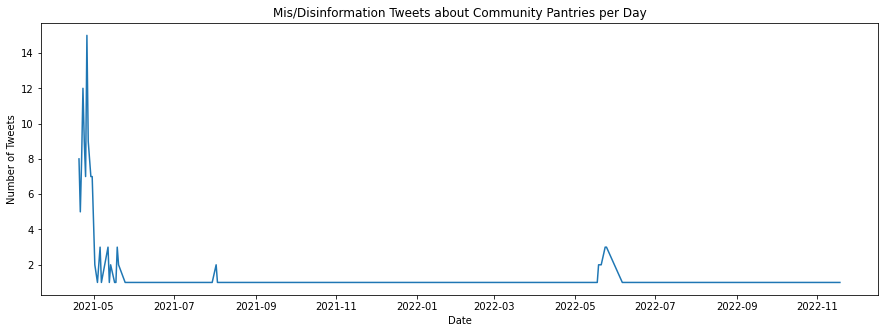

Date posted  Date posted
2021         4              95
             5              21
             6               5
             7               1
             8               4
             9               2
             10              1
             12              1
2022         2               1
             3               1
             4               1
             5              12
             6               2
             7               1
             8               1
             9               1
             11              2
dtype: int64
Total Number of Tweets: 152


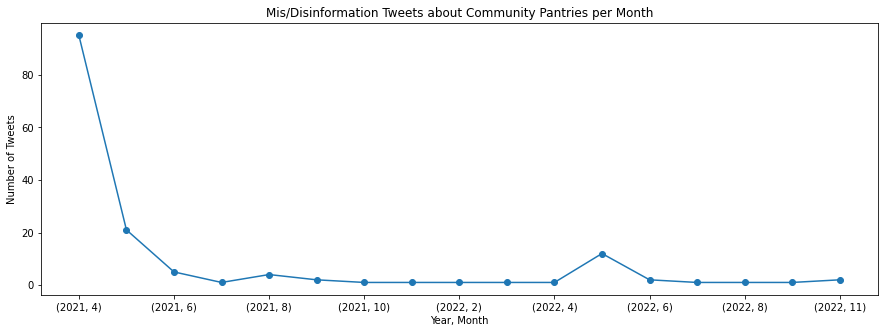

In [212]:
dates = sorted(df_encoded['Date posted'].dt.date.unique())

num_tweets = df_encoded['Date posted'].dt.date.value_counts().sort_index()
num_tweets.plot(kind = 'line',title = "Mis/Disinformation Tweets about Community Pantries per Day", xlabel= "Date", ylabel='Number of Tweets',figsize=(15,5))
plt.show()

print("="*30)
month_tweets = df_encoded.groupby([df_encoded['Date posted'].dt.year, df_encoded['Date posted'].dt.month]).size()
print(month_tweets)
print("Total Number of Tweets:",month_tweets.sum())
print("="*30)
      
month_tweets.plot(style="-o", kind = 'line',title = "Mis/Disinformation Tweets about Community Pantries per Month", xlabel= "Year, Month", ylabel='Number of Tweets',figsize=(15,5))
plt.show()

We find that 95 out of the 152 tweets collected were posted on the month of April 2021. It is followed by the month of May 2021 where 21 tweets were posted. There is a noticable spike of tweets during the month of May 2022.

### **Visualization**

In this section, we visualize the trends of content types, account types, tweet types, and engagements with respect to our timeframe.

**Line Graphs**

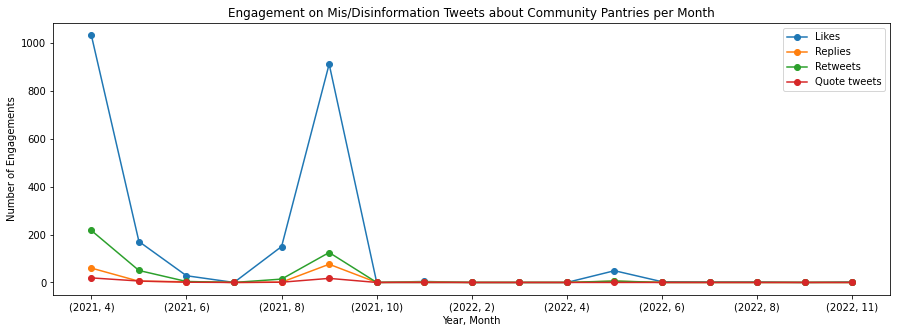

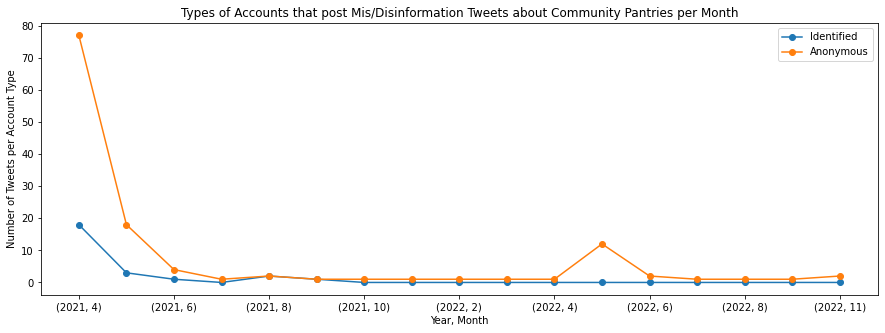

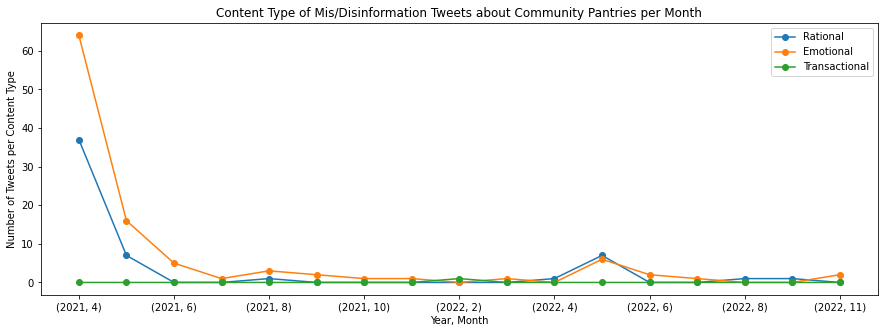

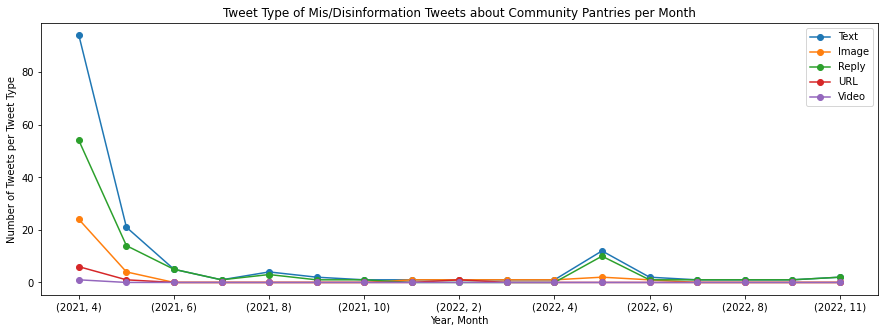

In [213]:
engage_cols = ['Likes', 'Replies', 'Retweets', 'Quote tweets']
engage_tweets = df_encoded.groupby([df_encoded['Date posted'].dt.year, df_encoded['Date posted'].dt.month])[engage_cols].sum().sort_index()
engage_tweets.plot(style="-o", kind = 'line',title = "Engagement on Mis/Disinformation Tweets about Community Pantries per Month", xlabel= "Year, Month", ylabel='Number of Engagements',figsize=(15,5))
plt.show()

acc_cols = ['Identified', 'Anonymous']
acc_tweets = df_encoded.groupby([df_encoded['Date posted'].dt.year, df_encoded['Date posted'].dt.month])[acc_cols].sum().sort_index()
acc_tweets.plot(style="-o", kind = 'line',title = "Types of Accounts that post Mis/Disinformation Tweets about Community Pantries per Month", xlabel= "Year, Month", ylabel='Number of Tweets per Account Type',figsize=(15,5))
plt.show()

content_cols = ['Rational', 'Emotional', 'Transactional']
content_tweets = df_encoded.groupby([df_encoded['Date posted'].dt.year, df_encoded['Date posted'].dt.month])[content_cols].sum().sort_index()
content_tweets.plot(style="-o", kind = 'line',title = "Content Type of Mis/Disinformation Tweets about Community Pantries per Month", xlabel= "Year, Month", ylabel='Number of Tweets per Content Type',figsize=(15,5))
plt.show()

tweet_cols = ['Text','Image','Reply', 'URL','Video']
type_tweets = df_encoded.groupby([df_encoded['Date posted'].dt.year, df_encoded['Date posted'].dt.month])[tweet_cols].sum().sort_index()
type_tweets.plot(style="-o", kind = 'line',title = "Tweet Type of Mis/Disinformation Tweets about Community Pantries per Month", xlabel= "Year, Month", ylabel='Number of Tweets per Tweet Type',figsize=(15,5))
plt.show()

**Histograms**

Here we see the distribution (spread) of the engagement the collected tweets received. 

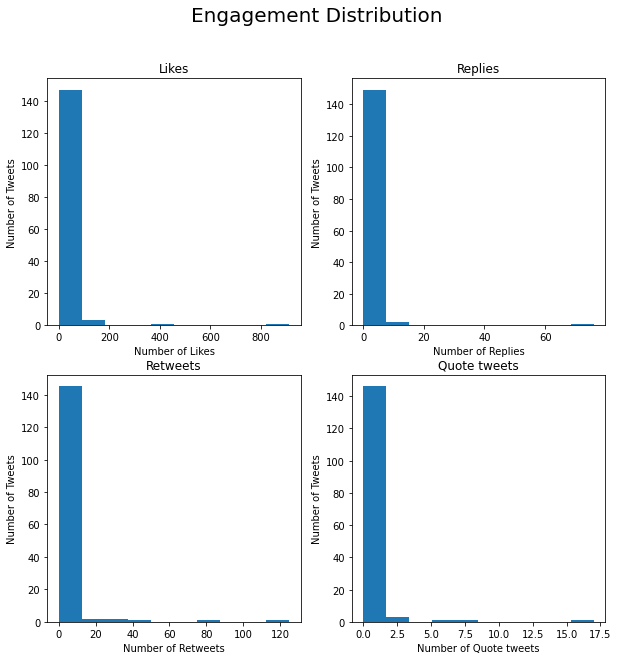

In [214]:
plt.figure(figsize=(10,10))
plt.suptitle("Engagement Distribution", fontsize=20)
plt.subplot(221)
plt.title('Likes')
df_encoded['Likes'].plot.hist()
plt.xlabel('Number of Likes')
plt.ylabel('Number of Tweets')
plt.subplot(222)
plt.title('Replies')
df_encoded['Replies'].plot.hist()
plt.xlabel('Number of Replies')
plt.ylabel('Number of Tweets')
plt.subplot(223)
plt.title('Retweets')
df_encoded['Retweets'].plot.hist()
plt.xlabel('Number of Retweets')
plt.ylabel('Number of Tweets')
plt.subplot(224)
plt.title('Quote tweets')
df_encoded['Quote tweets'].plot.hist()
plt.xlabel('Number of Quote tweets')
plt.ylabel('Number of Tweets')
plt.show()

From the distribution, we can tell that most of the tweets have little to no engagement.

**Bar Graphs**

Here we show the distribution of Account types, Content types, and Tweet types that occured over the 152 tweets collected using bar graphs.

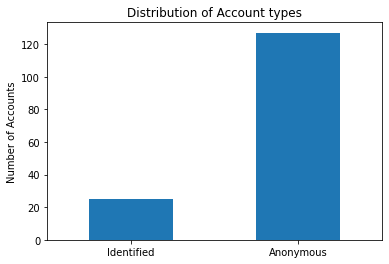

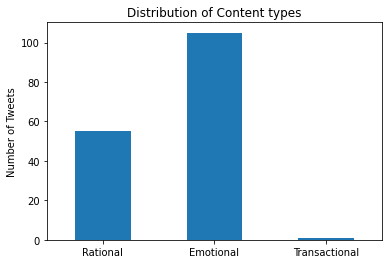

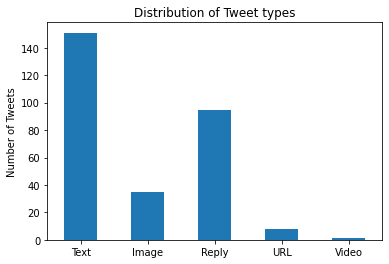

In [215]:
df_encoded[acc_cols].sum().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of Accounts')
plt.title('Distribution of Account types')
plt.show()
df_encoded[content_cols].sum().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of Tweets')
plt.title('Distribution of Content types')
plt.show()
df_encoded[tweet_cols].sum().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweet types')
plt.show()

We can observe that majority of the tweets are posted by anonymous twitter users, attempts to appeal to the reader's emotion, and is usually comprised of text.

Total number of users is 117


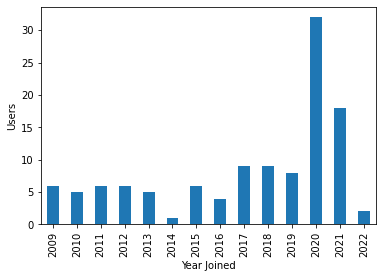

In [216]:
df_encoded.drop_duplicates(subset =['Account handle'])['Joined'].dt.year.value_counts().sort_index().plot.bar()
print("Total number of users is", df_encoded.drop_duplicates(subset =['Account handle']).shape[0])
plt.xlabel('Year Joined')
plt.ylabel('Users')
plt.show()

We also plotted the values of the *Joined* feature where it becomes evident that most of the users joined in the year 2020 followed by the year 2021.

**Scatter Plots**

Here we generate a scatter plot to observe whether the account join date has any correlation to the tweet's post date.

Number of unique users: 117


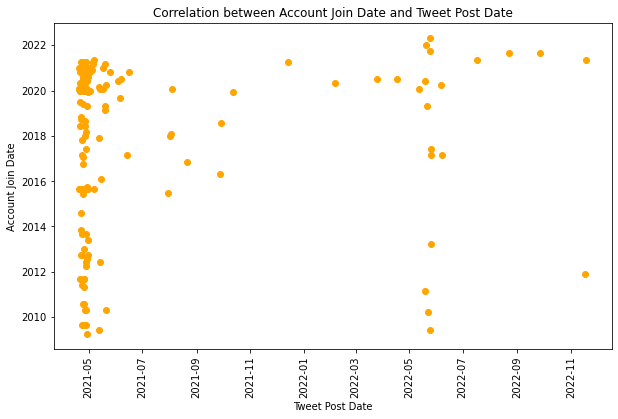

In [217]:
print("Number of unique users:",df_encoded['Account handle'].nunique())
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['Date posted'],df_encoded['Joined'], color = 'orange')
plt.xlabel('Tweet Post Date')
plt.ylabel('Account Join Date')
plt.title('Correlation between Account Join Date and Tweet Post Date')
plt.xticks(rotation = 90)

plt.show()

From the scatter plot, there is a notable concentration of users who joined between the years 2020 to 2021 and posted a mis/disinformation tweet during the months of April and May 2021. 